# Sistem Rekomendasi Game

## Library Import

In [ ]:
# Library untuk Mengelola data dan Visualisasi
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud

# Library untuk Membagi Data Menjadi Data Latih dan Uji
from sklearn.model_selection import train_test_split

#Library untuk TF-IDF dan Cosine Similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Library untuk Model Deep Learning
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau



Penjelasan:Library-library diatas adalah library yang dipakai selama proses dari awal yaitu data loading sampai evaluasi

## Data Loading

In [49]:
df_game  = pd.read_csv('games_metadata_5k.csv')
df_game

,game_id,name,description,genres,platforms,rating,released,cover_image,game_link,metacritic_url
0,3498,Grand Theft Auto V,"<p>Rockstar Games went bigger, since their pre...",Action,"PC, PlayStation 5, Xbox Series S/X, PlayStatio...",4.47,2013-09-17,https://media.rawg.io/media/games/20a/20aa03a1...,https://rawg.io/games/grand-theft-auto-v,"<p>Rockstar Games went bigger, since their pre..."
1,3328,The Witcher 3: Wild Hunt,"<p>The third game in a series, it holds nothin...","Action, RPG","Xbox Series S/X, PlayStation 5, macOS, PlaySta...",4.65,2015-05-18,https://media.rawg.io/media/games/618/618c2031...,https://rawg.io/games/the-witcher-3-wild-hunt,"<p>The third game in a series, it holds nothin..."
2,4200,Portal 2,<p>Portal 2 is a first-person puzzle game deve...,"Shooter, Puzzle","PlayStation 3, PC, Xbox 360, Linux, macOS, Xbo...",4.59,2011-04-18,https://media.rawg.io/media/games/2ba/2bac0e87...,https://rawg.io/games/portal-2,<p>Portal 2 is a first-person puzzle game deve...
3,4291,Counter-Strike: Global Offensive,<p>Counter-Strike is a multiplayer phenomenon ...,Shooter,"PC, Linux, Xbox 360, PlayStation 3",3.56,2012-08-21,https://media.rawg.io/media/games/736/73619bd3...,https://rawg.io/games/counter-strike-global-of...,<p>Counter-Strike is a multiplayer phenomenon ...
4,5286,Tomb Raider (2013),<p>A cinematic revival of the series in its ac...,Action,"PlayStation 3, Xbox 360, macOS, PC, Xbox One, ...",4.06,2013-03-05,https://media.rawg.io/media/games/021/021c4e21...,https://rawg.io/games/tomb-raider,<p>A cinematic revival of the series in its ac...
...,...,...,...,...,...,...,...,...,...,...
4995,18625,"Gabriel Knight 3: Blood of the Sacred, Blood o...",<p>One frightening truth.<br />\nWelcome to th...,Adventure,PC,3.05,1999-11-19,https://media.rawg.io/media/screenshots/582/58...,https://rawg.io/games/gabriel-knight-3-blood-o...,<p>One frightening truth.<br />\nWelcome to th...
4996,1311,Boson X,Quantum jump your way to critical velocity in ...,"Action, Arcade, Casual, Indie","Linux, PC, Android, iOS, macOS",3.16,2013-09-26,https://media.rawg.io/media/screenshots/23a/23...,https://rawg.io/games/boson-x,Quantum jump your way to critical velocity in ...
4997,331454,"Pokémon Black 2, White 2",NaN,"Adventure, RPG",Nintendo DS,4.31,2012-10-07,https://media.rawg.io/media/games/abf/abf12c25...,https://rawg.io/games/pokemon-white-version-2,NaN
4998,50737,Bayonetta 3,<p>Bayonetta struts through multiple locations...,Action,Nintendo Switch,4.24,2022-10-28,https://media.rawg.io/media/games/c30/c30ac50c...,https://rawg.io/games/bayonetta-3,<p>Bayonetta struts through multiple locations...


In [50]:
df_rating  = pd.read_csv('game_ratings.csv')
df_rating

,game_id,user_id,rating
0,3498,user_4971,4
1,3498,user_957,3
2,3498,user_2078,2
3,3498,user_7147,2
4,3498,user_8630,5
...,...,...,...
273664,17792,user_8383,4
273665,17792,user_9926,1
273666,17792,user_4660,4
273667,17792,user_7378,4


## EDA

In [51]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         5000 non-null   int64  
 1   name            5000 non-null   object 
 2   description     4970 non-null   object 
 3   genres          4976 non-null   object 
 4   platforms       4999 non-null   object 
 5   rating          5000 non-null   float64
 6   released        4964 non-null   object 
 7   cover_image     4996 non-null   object 
 8   game_link       5000 non-null   object 
 9   metacritic_url  4970 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 390.8+ KB


In [52]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273669 entries, 0 to 273668
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   game_id  273669 non-null  int64 
 1   user_id  273669 non-null  object
 2   rating   273669 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.3+ MB


Penjelasan:Dari df_game kita mendapatkan informasi yaitu terdiri dari 10 kolom dan 5000 baris,dengan 2 kolom bertipe numerik yaitu,game_id dan juga rating dan sisanya bertipe data object.Dari jumlah Non-Null Count kita bisa melihat sekilas ada missing value namun akan di cek lebih lanjut pada tahap berikutnya.
Untuk df_rating kita mendapati terdiri dari 3 kolom dan 273669 baris,dengan 2 kolom bertipe numerik(int) dan satu kolom bertipe object.Sekilas pada Non-Null Count tidak ditemukan missing value.

In [53]:
#Mengecek Missing Values
print("Missing Values pada df_game:")
df_game.isna().sum()

Missing Values pada df_game:


,0
game_id,0
name,0
description,30
genres,24
platforms,1
rating,0
released,36
cover_image,4
game_link,0
metacritic_url,30


In [54]:
#Mengecek Missing Values
print("\n Missing Values pada df_rating:")
df_rating.isna().sum()


 Missing Values pada df_rating:


,0
game_id,0
user_id,0
rating,0


Penjelasan:Untuk Data game kita bisa melihat bahwa kolom description,genres,platforms,release dan metacritic_url memiliki missing value.Missing value ini nantinya akan dilakukan imputasi  pada tahap data preparation.Untuk data rating kita tisak menemukan missing value.

In [55]:
#Cek Duplikasi Data
print("Total Duplikat di df_name:")
print(df_game.duplicated().sum())
print("Total Duplikat di df_rating:")
print(df_rating.duplicated().sum())

Total Duplikat di df_name:
0
Total Duplikat di df_rating:
0


Penjelasan:Tidak ditemukan nilai duplikasi pada data game
Tidak ditemukan nilai duplikasi pada data rating

### EDA Univariate & Multivariate df_game

Text(0, 0.5, 'Frekuensi')

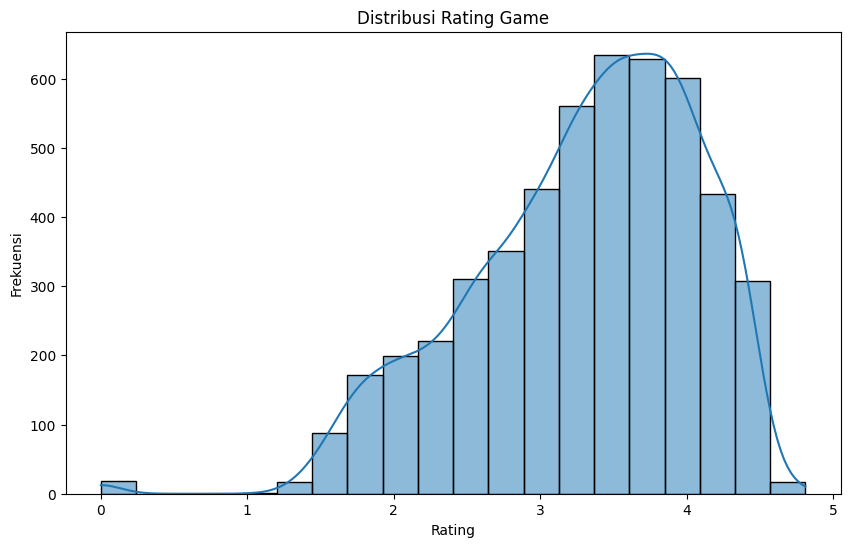

In [56]:
#Distribusi Rating Game
plt.figure(figsize=(10, 6))
sns.histplot(df_game['rating'], bins=20, kde=True)
plt.title('Distribusi Rating Game')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')

Penjelasan:Distribusi dari rating game cenderung normal namun sedikit miring ke kiri dengan pusat distribusi datanya berada di nilai diatas 3,dengan puncak frekuensi sekitar 3.5 sampai 4

Text(0.5, 0, 'Jumlah Game')

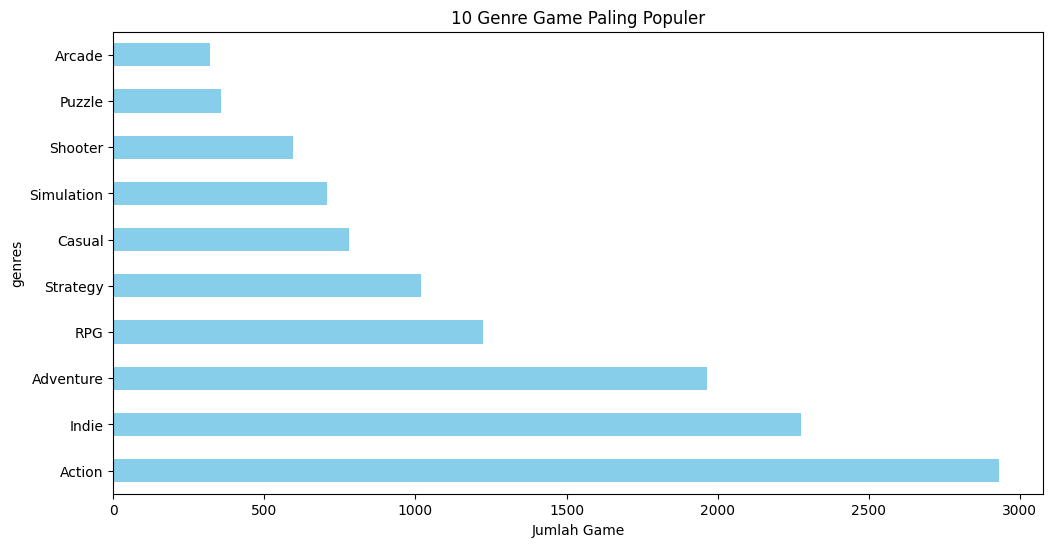

In [57]:
#Bar Chart 10 Genre Game Paling Populer
genre_counts = df_game['genres'].str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='barh', color='skyblue')
plt.title('10 Genre Game Paling Populer')
plt.xlabel('Jumlah Game')

Penjelasan:Berdasarkan diagram batang diatas kita bisa melihat bahwa 10 genre terpopuler adalah Action sebanyak kurang dari 3000 diikuti dengan genre indie dan yang terakhir adalah Arcade.

Text(0.5, 1.0, 'Distribusi Platform Game')

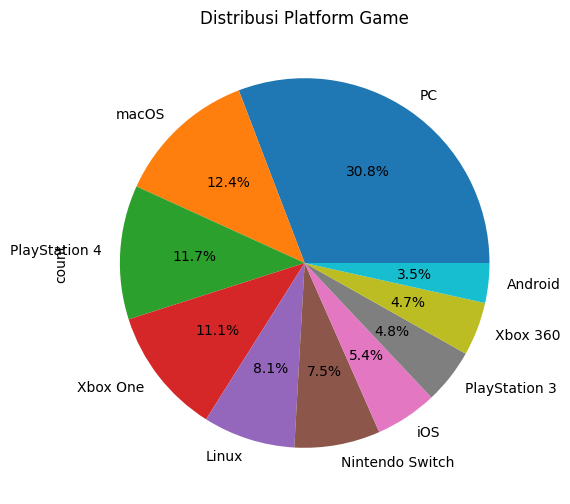

In [58]:
#Membuat Pie Chart untuk Platform
platform_counts = df_game['platforms'].str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(12, 6))
platform_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribusi Platform Game')

Penjelasan:Diagram diatas memberikan insight bahwa kebanyakan game dapat di platform PC diikuti oleh macos lalu Playstation 4 dan yang paling sedikit adalah android.

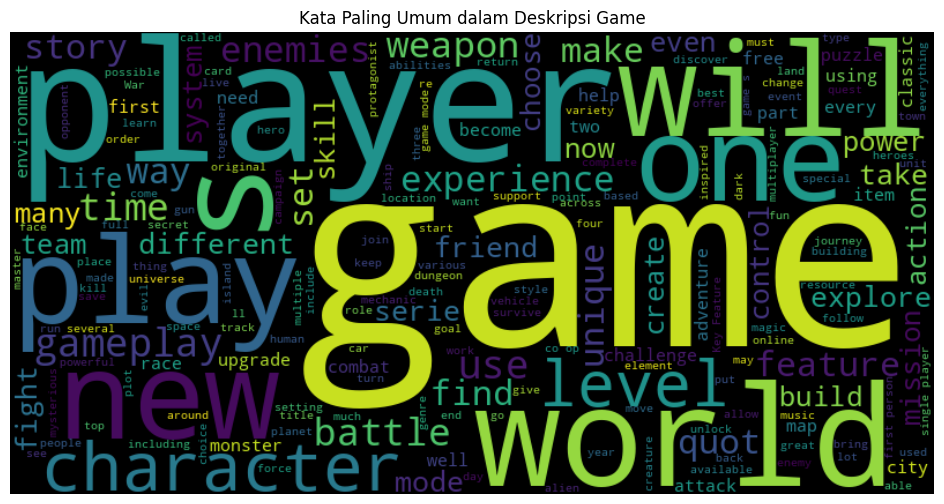

In [59]:
# Function to remove HTML tags
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

cleaned_texts_for_wordcloud = []

# Iterasi melalui setiap deskripsi di kolom 'description'
for desc in df_game['description']:
    if pd.notna(desc): # Pastikan bukan NaN/None
        cleaned_texts_for_wordcloud.append(remove_html_tags(desc))

# Join all the cleaned descriptions into a single string
text = ' '.join(cleaned_texts_for_wordcloud)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Kata Paling Umum dalam Deskripsi Game')
plt.show()

Penjelasan:Wordcloud menunjukkan menunjukkan bahwa deskripsi game umumnya menekankan pada pengalaman pemain, dengan kata-kata seperti "player", "play", dan "experience" yang muncul secara dominan. Selain itu, aspek eksplorasi juga menjadi tema penting, terlihat dari seringnya kata "world", "explore", dan "level" digunakan

Text(0.5, 1.0, 'Rating vs. Tahun Rilis')

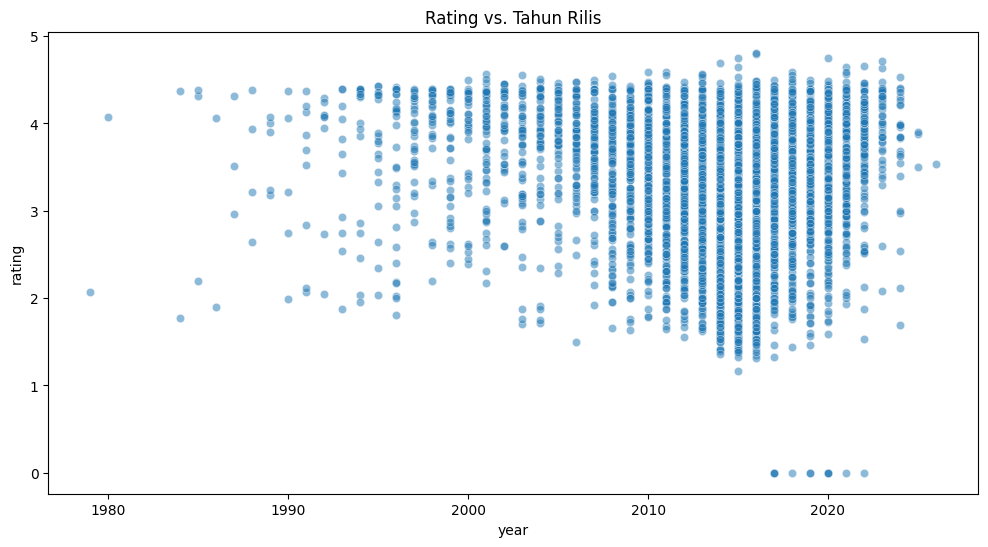

In [60]:
df_game['year'] = pd.to_datetime(df_game['released']).dt.year
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year', y='rating', data=df_game, alpha=0.5)
plt.title('Rating vs. Tahun Rilis')

Penjelasan:Kita bisa melihat bahwa jumlah game yang dirilis meningkat secara signifikan dari waktu ke waktu,terutama pada tahun 2010-an.Untuk distribusi rating game dengan rating 4 dan 5 konsisten terus sepanjang waktu namun untuk tidak ditemukan pola antara tahun rilis dengan rating.

<ipython-input-61-f1bbbf99cd92>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='name', data=top_games, palette='viridis')


Text(0.5, 1.0, '10 Game dengan Rating Tertinggi')

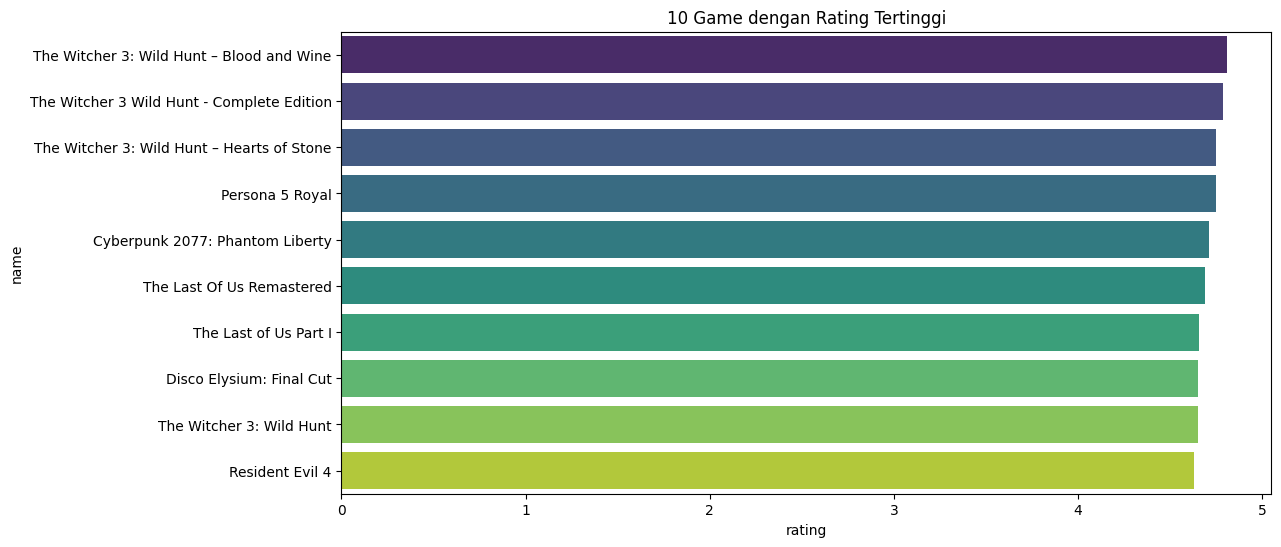

In [61]:
top_games = df_game.sort_values('rating', ascending=False).head(10)[['name', 'rating']]

plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='name', data=top_games, palette='viridis')
plt.title('10 Game dengan Rating Tertinggi')

Penjelasan:Grafik diatas menunjukkan 10 Game dengan Rating tertinggi.

### EDA Univariate & Multivariate df_rating

<ipython-input-62-bdca74f2bba4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df_rating, palette='viridis')


Text(0, 0.5, 'Jumlah')

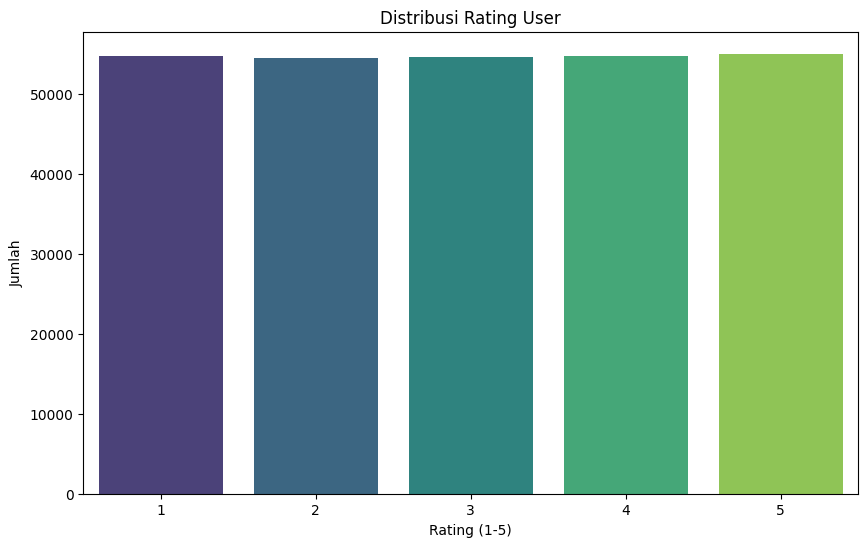

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df_rating, palette='viridis')
plt.title('Distribusi Rating User')
plt.xlabel('Rating (1-5)')
plt.ylabel('Jumlah')

Penjelasan:Berdasarkan Diagram diatas kita bisa melihat bahwa distribusi rating 1-5 seimbang antar satu sama lain.

Text(0, 0.5, 'Frekuensi User')

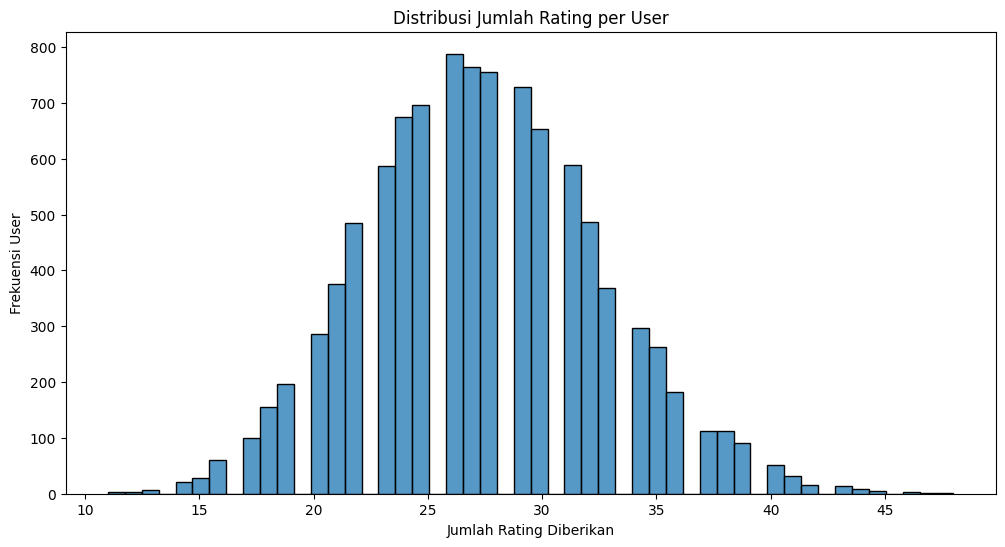

In [63]:
user_activity = df_rating['user_id'].value_counts()
plt.figure(figsize=(12, 6))
sns.histplot(user_activity, bins=50, kde=False)
plt.title('Distribusi Jumlah Rating per User')
plt.xlabel('Jumlah Rating Diberikan')
plt.ylabel('Frekuensi User')

Penjelasan:Berdasarkan grafik diatas dapat dilihat bahwa Distribusi jumlah rating per user seimbang.Mayoritas user memberi 25-30 rating.

Text(0.5, 0, 'Jumlah Rating')

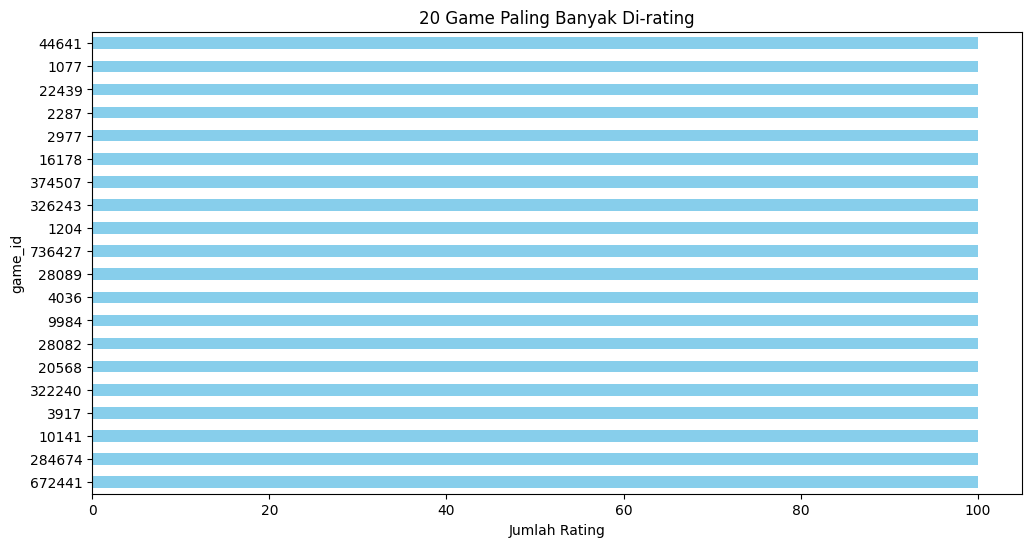

In [64]:
game_popularity = df_rating['game_id'].value_counts().head(20)
plt.figure(figsize=(12, 6))
game_popularity.plot(kind='barh', color='skyblue')
plt.title('20 Game Paling Banyak Di-rating')
plt.xlabel('Jumlah Rating')

Penjelasan:Berdasarkan diagram kita bisa melihat 20  game_id yang memiliki jumlah rating terbanyak.

## Data Preparation

### Data Preparation-CBF

In [65]:
#1.Drop kolom yang tidak dipakai
columns_to_drop = ['platforms', 'released','cover_image', 'game_link', 'metacritic_url','year','description']
games_cbf = df_game.drop(columns=columns_to_drop)

Penjelasan: Kami menghapus kolom-kolom seperti platforms, released, cover_image, game_link, metacritic_url, year, dan description karena informasi di dalamnya tidak cukup relevan dan terlalu banyak noise untuk model Content-Based Filtering yang kami terapkan. Langkah ini juga bertujuan untuk menyederhanakan dimensi dataset agar proses analisis lebih efisien dan fokus hanya pada fitur yang diperlukan.

In [66]:
#2.Imputasi Missing Values
games_cbf['genres'] = games_cbf['genres'].fillna('Unknown')

# Mengecek kembali Missing Values
print("Missing Values in games_cbf:")
print(games_cbf.isnull().sum())


Missing Values in games_cbf:
game_id    0
name       0
genres     0
rating     0
dtype: int64


Penjelasan : Langkah ini merupakan bagian dari proses data preparation untuk menangani nilai yang hilang (missing values) pada kolom genres. Nilai kosong pada kolom tersebut diisi dengan string 'Unknown' menggunakan metode imputasi sederhana.

Tahapan ini penting dilakukan karena kolom genres merupakan fitur utama dalam pendekatan Content-Based Filtering (CBF). Fitur ini digunakan untuk menghitung kemiripan antar item (dalam hal ini, game) berdasarkan konten atau atribut yang dimiliki. Jika terdapat nilai kosong, proses representasi konten—misalnya menggunakan metode TF-IDF—dapat terganggu dan menghasilkan output yang kurang akurat. Oleh karena itu, memastikan semua data pada kolom genres terisi adalah langkah krusial dalam menyiapkan dataset untuk CBF.

In [67]:
#3.Ubah Genre Jadi List
games_cbf['genre_list'] = games_cbf['genres'].apply(lambda x: [g.strip() for g in x.split(',')])

Penjelasan: Langkah ini merupakan bagian dari proses data preparation yang bertujuan untuk mengubah kolom genres dari format string menjadi format list (daftar). Setiap entri genre yang awalnya dipisahkan oleh koma dipecah menjadi elemen-elemen individual dalam list, dan dibersihkan dari spasi yang tidak perlu.

Tahapan ini diperlukan karena dalam metode Content-Based Filtering (CBF), fitur seperti genre akan digunakan untuk membangun representasi konten item (game), misalnya menggunakan metode TF-IDF atau teknik pemrosesan teks lainnya. Dengan format list, proses ekstraksi fitur dan perhitungan kemiripan antar item menjadi lebih terstruktur dan akurat.

In [68]:
games_cbf.head()

,game_id,name,genres,rating,genre_list
0,3498,Grand Theft Auto V,Action,4.47,[Action]
1,3328,The Witcher 3: Wild Hunt,"Action, RPG",4.65,"[Action, RPG]"
2,4200,Portal 2,"Shooter, Puzzle",4.59,"[Shooter, Puzzle]"
3,4291,Counter-Strike: Global Offensive,Shooter,3.56,[Shooter]
4,5286,Tomb Raider (2013),Action,4.06,[Action]


### Data Preparation CF

In [69]:
#1. Mengubah Nama kolom
df_rating.rename(columns={'user_id': 'userID', 'game_id': 'gameID'}, inplace=True)

Penjelasan Langkah ini bertujuan untuk mengubah nama dari kolom user_id menjadi userID dan game_id menjadi gameID,proses ini bertujuan untuk membuat nama kolom lebih konsisten dan memudahkan untuk proses selanjutnya dan mengindari error akibat kesalahan pemanggilan kolom.

In [70]:
#2. Encoded UserID
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df_rating['userID'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  ['user_4971', 'user_957', 'user_2078', 'user_7147', 'user_8630', 'user_8136', 'user_4273', 'user_6882', 'user_8426', 'user_1437', 'user_5515', 'user_8875', 'user_5785', 'user_178', 'user_380', 'user_8257', 'user_7001', 'user_7847', 'user_9144', 'user_1780', 'user_5171', 'user_7017', 'user_1493', 'user_7285', 'user_8362', 'user_1802', 'user_2936', 'user_2883', 'user_4696', 'user_4482', 'user_6034', 'user_4074', 'user_4932', 'user_7323', 'user_1111', 'user_8937', 'user_2079', 'user_1551', 'user_8598', 'user_9891', 'user_9708', 'user_6595', 'user_2798', 'user_7282', 'user_3310', 'user_5047', 'user_3725', 'user_8480', 'user_6360', 'user_4779', 'user_5740', 'user_8989', 'user_4138', 'user_2650', 'user_2973', 'user_7687', 'user_2569', 'user_526', 'user_9951', 'user_8228', 'user_5341', 'user_1347', 'user_2855', 'user_6325', 'user_8502', 'user_6991', 'user_6746', 'user_4983', 'user_6095', 'user_8208', 'user_3569', 'user_8470', 'user_3033', 'user_4357', 'user_8969', 'user_3019', '

Penjelasan : Langkah ini bertujuan untuk melakukan encoding terhadap userID agar data bisa diproses dalam bentuk numerik oleh model. Setiap userID diubah menjadi indeks unik, dan disiapkan pula dictionary kebalikannya untuk proses decoding hasil prediksi kembali ke ID pengguna asli. Encoding ini penting karena algoritma pembelajaran mesin tidak dapat bekerja langsung dengan data string/non-numerik.

In [71]:
#3.Encoded gameID
# Mengubah gameID menjadi list tanpa nilai yang sama
game_ids = df_rating['gameID'].unique().tolist()
print('list gameID: ', game_ids)

# Melakukan proses encoding gameID
game_to_game_encoded = {x: i for i, x in enumerate(game_ids)}

# Melakukan proses encoding angka ke gameID
game_encoded_to_game = {i: x for i, x in enumerate(game_ids)}

list gameID:  [3498, 3328, 4200, 4291, 5286, 13536, 12020, 5679, 28, 4062, 13537, 802, 3439, 4286, 32, 3939, 58175, 3070, 11859, 1030, 2454, 41494, 422, 10213, 766, 4459, 3272, 278, 29028, 7689, 3287, 3192, 290856, 16944, 17822, 416, 19103, 11973, 23027, 41, 9767, 4427, 18080, 19710, 11936, 19709, 2551, 10754, 10035, 3612, 4252, 654, 3790, 1447, 10142, 10533, 4161, 9721, 13668, 11935, 19487, 4332, 3696, 4386, 58134, 29177, 39, 4828, 5563, 12447, 9882, 864, 10243, 17540, 4248, 12536, 13633, 5583, 362, 3144, 430, 4514, 3841, 58812, 11934, 257201, 4570, 2462, 3017, 4806, 3604, 3543, 19301, 50738, 13535, 11142, 3603, 3747, 108, 11147, 3636, 4513, 326292, 10141, 274755, 4166, 46889, 613, 3191, 10989, 17576, 9810, 25, 22509, 10065, 480, 3387, 923, 3254, 17572, 9743, 45969, 13910, 13554, 28179, 13627, 5525, 18240, 1416, 23585, 2361, 51329, 9830, 3687, 28201, 2743, 1450, 3931, 4280, 8488, 50734, 2819, 2093, 3556, 4223, 58616, 3678, 58654, 4502, 11052, 28154, 2235, 28568, 262382, 10340, 356714,

Penjelasan : Langkah ini sama seperti sebelumnya yaitu melakukan encoding terhadap kolom gameID

In [72]:
#4.Mapping
# Mapping userID ke dataframe user
df_rating['user'] = df_rating['userID'].map(user_to_user_encoded)

# Mapping placeID ke dataframe game
df_rating['game'] = df_rating['gameID'].map(game_to_game_encoded)

Penjelasan : Melakukan mapping ID(useID,gameID) ke indeks numerik menggunkan hasil encoding sebelumnya,lalu dimasukkan sebagai dataframe kolom baru(user dan game).Tahapan ini penting karena kolom user dan game berisi indeks yang akan di proses deep learning nantinya.

In [73]:
#5.Mendapatkan jumlah user dan game
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah game
num_game = len(game_encoded_to_game)
print(num_game)

print('Number of User: {}, Number of Game:{}'.format(
    num_users,num_game
))

10000
5000
Number of User: 10000, Number of Game:5000


Penjelasan : Di Tahapan ini,kita menghitung jumlah user dan game berdasarkan hasil encoding sebelumnya,Tahapan ini diperlukan untuk mendefinisikan dimensi input model dan membantu efisiensi memori.

In [74]:
#6.Konversi Tipe Data
# Mengubah rating menjadi nilai float
df_rating['rating'] = df_rating['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df_rating['rating'])

# Nilai maksimal rating
max_rating = max(df_rating['rating'])

Penjelasan : Melakukan Perubahan tipe data kolom rating menjadi float untuk keperluan modelling dan menampilkan nilai maksimun dan minimun dari kolom rating.Tahapan ini dilakukan untuk keperluan saat modeling karena membutuhkan input bertipe float dan max dan min rating digunakan untuk normalisasi rating

In [75]:
7. # Mengacak dataset
df = df_rating.sample(frac=1, random_state=42)
df

,gameID,userID,rating,user,game
114885,44972,user_2403,3.0,6450,2109
26483,5297,user_7785,3.0,1046,486
170051,21113,user_5722,1.0,4869,3118
214116,4267,user_1151,3.0,984,3919
110883,11751,user_2658,3.0,6791,2037
...,...,...,...,...,...
119879,301539,user_8148,1.0,8198,2201
259178,17526,user_6293,2.0,369,4732
131932,37357,user_6025,1.0,9354,2424
146867,17947,user_7473,2.0,5060,2701


Penjelasan : Data pada df_rating diacak menggunakan fungsi .sample,tetapi dalam pengacakannya diterapkan random_state = 42 untuk memastikan tiap pengacakan konsisten dan reproducible.
Ini penting dilakukan agar model tidak belajar dari pola urutan data dan mengindari bias.

In [76]:
#8.Feature Construction & Normalization (Scaling)
# Membuat variabel x untuk mencocokkan data user dan game menjadi satu value
x = df[['user', 'game']].values
# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

Penjelasan:Tahapan ini merupakan pembuatan fitur dan normalisasi target, Hal ini dilakukan untuk memastikan data memiliki format dan skala yang sesuai untuk dimasukkan ke dalam model deep learning

In [77]:
#9.Data Splitting
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
print(x, y)

[[6450 2109]
 [1046  486]
 [4869 3118]
 ...
 [9354 2424]
 [5060 2701]
 [9818 2242]] [0.5  0.5  0.   ... 0.   0.25 0.5 ]


Penjelasan:Tahapan ini merupakan pembagian dataset dengan porsi 80:20,tahapan ini sangat penting untuk melatih model berdasarkan 80% data yang ada dan 20% lagi sebagai validasi untuk mencegah overfitting

##Modeling

### Model Content-Based Filtering

In [78]:
tfidf = TfidfVectorizer(stop_words='english')
# Melakukan perhitungan idf pada games_cbf 'genres'
tfidf.fit(games_cbf['genres'])
tfidf.get_feature_names_out()


array(['action', 'adventure', 'arcade', 'board', 'card', 'casual',
       'educational', 'family', 'fighting', 'games', 'indie', 'massively',
       'multiplayer', 'platformer', 'puzzle', 'racing', 'rpg', 'shooter',
       'simulation', 'sports', 'strategy', 'unknown'], dtype=object)

Penjelasan:TF-IDF Vebctorizer digunakan untuk mengubah data kolom genre menjadi representasi numerik.Setelah proses fit,model akan menghasilkan genre unik yang akan berfungsi sebagai fitur.Ini yang akan dipakai untuk kemiripan antar game berdasarkan genre

In [79]:
tfidf_matrix = tfidf.fit_transform(games_cbf['genres'])
tfidf_matrix.shape

(5000, 22)

Penjelasan:Seluruh kolom genre akan akan diubah menjadi matriks dengan ukuran 5000 baris x 22 kolom

In [80]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.53747854, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.62642902, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

Penjelasan:Menggunakan fungsi todense akan mengubah vektor menjadi bentuk matriks,dimana 0 merepresentasikan genre tersebut tidak relevan dengan game sedangkan 1 merepresentasikan game dan genre tersebut relevan

In [81]:
# Membuat DataFrame untuk melihat TF-IDF matrix
# Kolom diisi dengan genre
# Baris diisi dengan nama game

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf.get_feature_names_out(),
    index=games_cbf.name
).sample(22, axis=1).sample(10, axis=0)


,rpg,unknown,sports,indie,educational,arcade,action,board,fighting,massively,...,adventure,simulation,racing,strategy,games,card,multiplayer,puzzle,family,platformer
name,,,,,,,,,,,,,,,,,,,,,
Seasons After Fall,0.000000,0.0,0.0,0.678480,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.734619,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000
LEGO Harry Potter Collection,0.000000,0.0,0.0,0.000000,0.0,0.0,0.406382,0.0,0.0,0.000000,...,0.512403,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000
Dragonsphere,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000
Vampire: The Masquerade - Bloodlines,0.843277,0.0,0.0,0.000000,0.0,0.0,0.537479,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000
Killer Instinct,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000
Get Even,0.000000,0.0,0.0,0.586239,0.0,0.0,0.503411,0.0,0.0,0.000000,...,0.634745,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000
Hunted: The Demon’s Forge,0.000000,0.0,0.0,0.000000,0.0,0.0,0.621389,0.0,0.0,0.000000,...,0.783503,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000
Banjo-Kazooie,0.000000,0.0,0.0,0.000000,0.0,0.0,0.259897,0.0,0.0,0.000000,...,0.327702,0.0,0.0,0.0,0.0,0.0,0.000000,0.61572,0.0,0.667798
Overwatch 2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.223928,0.0,0.0,0.608784,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.608784,0.00000,0.0,0.000000


Penjelasan:Membuat dataframe agar lebih mudah dipahami

In [82]:
#Menghitung cosine-similarity antar game berdasarkan proses TDF-IF genre sebelumnya
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.53747854, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.53747854, 1.        , 0.        , ..., 0.65731659, 0.53747854,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.65731659, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.53747854, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

Penjelasan:Cosine similarity ini akan menghitung seberapa mirip sebuah game dengan game lainnya berdasarkan genre.

In [83]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=games_cbf['name'], columns=games_cbf['name'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (5000, 5000)


name,"Warhammer 40,000: Space Marine",Comix Zone,Europa Universalis IV,ANCESTORS: The Humankind Odyssey,Corporate Lifestyle Simulator
name,,,,,
GreedFall,0.195861,0.444930,0.000000,0.887893,0.184405
Uncanny Valley,0.221605,0.503411,0.000000,0.784748,0.491592
Assassin's Creed Origins,0.236601,0.537479,0.000000,0.735007,0.222763
Dynamite Jack,0.221605,0.503411,0.000000,0.784748,0.491592
Sam & Max: Episode 203 - Night of the Raving Dead,0.000000,0.000000,0.000000,0.234028,0.000000
Crystals of Time,0.000000,0.000000,0.000000,0.243986,0.910068
Simply Chess,0.000000,0.000000,0.609834,0.193366,0.721255
Supraland,0.142384,0.323447,0.000000,0.504210,0.315854
Rain on Your Parade,0.161699,0.367325,0.000000,0.572609,0.886276


Penjelasan:Membuat dataframe yang menunjukkan kemiripan antara satu game dengan game dengan indeks dan kolomnya berupa nama game tersebut.0 untuk menunjukkan bahwa tidak ada kemiripan dan 1 untuk menunjukkan bahwa ada kemiripan dengan game tersebut.

In [84]:
def game_recommendations(nama_game, similarity_data=cosine_sim_df, items=games_cbf[['name', 'genres']], k=5):
    """
    Memberikan rekomendasi game berdasarkan kemiripan dari dataframe similarity.

    Parameter:
    ---
    nama_game : str
        Nama game sebagai indeks dalam dataframe kemiripan.

    similarity_data : pd.DataFrame
        DataFrame simetri berisi nilai kesamaan antar game,
        dengan nama game sebagai indeks dan kolom.

    items : pd.DataFrame
        DataFrame yang memuat nama dan fitur lain dari game
        yang digunakan untuk rekomendasi.

    k : int
        Jumlah rekomendasi game yang ingin ditampilkan.

    Return:
    ---
    pd.DataFrame
        DataFrame berisi k game yang paling mirip dengan nama_game.
    """
    # Mendapatkan index dari game-game dengan similarity terbesar (tanpa termasuk game itu sendiri)
    index = similarity_data.loc[:, nama_game].to_numpy().argpartition(range(-1, -k-1, -1))

    # Mengambil nama-nama game yang paling mirip berdasarkan indeks
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Menghapus nama game asal dari daftar rekomendasi jika masih ada
    closest = closest.drop(nama_game, errors='ignore')

    # Menggabungkan dengan item detail untuk mendapatkan informasi tambahan seperti genre
    return pd.DataFrame(closest, columns=['name']).merge(items, on='name').head(k)


In [85]:
game_recommendations('Grand Theft Auto: San Andreas')

,name,genres
0,Grand Theft Auto V,Action
1,Ghostbusters: The Video Game,Action
2,Silent Hill 4: The Room,Action
3,The Legend of Korra,Action
4,A.V.A. Alliance of Valiant Arms,Action


### Model Collaborative Content

In [86]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Model

class RecommenderNet(Model):
    def __init__(self, num_users, num_games, embedding_size, dropout_rate, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)

        self.user_embedding = layers.Embedding(
            num_users, embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=regularizers.l2(1e-4)
        )
        self.user_bias = layers.Embedding(num_users, 1)

        self.game_embedding = layers.Embedding(
            num_games, embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=regularizers.l2(1e-4)
        )
        self.game_bias = layers.Embedding(num_games, 1)

        self.concat_dropout = layers.Dropout(dropout_rate)
        self.dense1 = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4))
        self.bn1 = layers.BatchNormalization()
        self.dropout1 = layers.Dropout(dropout_rate)

        self.dense2 = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1e-4))
        self.bn2 = layers.BatchNormalization()
        self.dropout2 = layers.Dropout(dropout_rate)

        self.output_layer = layers.Dense(1, activation='sigmoid')

    def call(self, inputs, training=False):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        game_vector = self.game_embedding(inputs[:, 1])
        game_bias = self.game_bias(inputs[:, 1])

        dot_product = tf.reduce_sum(user_vector * game_vector, axis=1, keepdims=True)
        concat = tf.concat([user_vector, game_vector, dot_product, user_bias, game_bias], axis=1)
        x = self.concat_dropout(concat, training=training)

        x = self.dense1(x)
        x = self.bn1(x, training=training)
        x = self.dropout1(x, training=training)

        x = self.dense2(x)
        x = self.bn2(x, training=training)
        x = self.dropout2(x, training=training)

        return self.output_layer(x)

Penjelasan:Membuat model dengan rekomendasi berbasis deep learning. Ini dirancang untuk memprediksi seberapa besar kemungkinan seorang pengguna menyukai sebuah game, dengan pendekatan sebagai berikut:


*   Embedding Layer:Model menggunakan dua buah embedding untuk pengguna dan game
*   Interaksi Pengguna-Game:Vektor embedding dari pengguna dan game digunakan untuk menghitung interaksi melalui dot product. Selain itu, ditambahkan juga bias pengguna dan bias game untuk memperkuat representasi.
*   Concatenation & Deep Layers:Hasil dot product, embedding pengguna dan game, serta bias digabungkan (concatenate) menjadi satu vektor. Vektor ini kemudian diproses melalui dua fully connected layer berukuran 64 dan 32 unit, masing-masing menggunakan aktivasi ReLU, batch normalization, dan dropout untuk regularisasi.
*   Output Layer:Layer terakhir adalah dense layer berukuran 1 dengan aktivasi sigmoid





In [87]:
model = RecommenderNet(num_users, num_game, embedding_size=128,dropout_rate=0.5)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Penjelasan : menginisialisasi model RecommenderNet dengan ukuran embedding 128,dan dropout sebesar 0.5 untuk mencegah model mengalami overfit kemudian melakukan kompilasi terhadap model tersebut menggunakan optimizer Adam dengan learning rate 0.0001. Fungsi loss yang dipakai adalah Mean Squared Error (MSE), yang efektif untuk masalah regresi karena memberikan penalti lebih besar pada kesalahan prediksi yang besar. Sebagai metrik evaluasi, digunakan Root Mean Squared Error (RMSE) yang umum untuk menilai akurasi model rekomendasi, karena mengukur rata-rata kesalahan prediksi dalam skala yang sama dengan rating.

In [88]:
  early_stop = tf.keras.callbacks.EarlyStopping(
      monitor='val_loss',
      patience=5,
      min_delta=1e-4,
      restore_best_weights=True,
      verbose=1
  )
  lr_reduce = tf.keras.callbacks.ReduceLROnPlateau(
      monitor='val_loss',
      factor=0.5,
      patience=2,
      min_lr=1e-5,
      verbose=1
  )

Penjelasan : Ini menginisialisasi dua callback penting untuk proses pelatihan model agar lebih efisien dan mencegah overfitting:

EarlyStopping digunakan untuk menghentikan pelatihan lebih awal ketika nilai validasi loss (val_loss) sudah tidak membaik secara signifikan (min_delta=1e-4) selama 5 epoch berturut-turut (patience=5). Selain itu, model akan mengembalikan bobot terbaik yang pernah didapatkan selama pelatihan (restore_best_weights=True). Callback ini membantu menghindari pelatihan berlebihan (overfitting) dan menghemat waktu.

ReduceLROnPlateau menurunkan laju pembelajaran (learning rate) secara otomatis jika validasi loss tidak membaik selama 2 epoch berturut-turut (patience=2). Penurunan dilakukan dengan faktor 0.5 (factor=0.5), namun laju pembelajaran tidak akan turun di bawah nilai minimum yang sudah ditetapkan (min_lr=1e-5). Hal ini memungkinkan optimizer untuk melakukan langkah pembaruan bobot yang lebih halus saat pelatihan mulai mendekati konvergensi, sehingga model bisa mencapai performa lebih baik.

In [89]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=256,
    epochs=50,
    validation_data=(x_val, y_val),
    callbacks=[early_stop,lr_reduce],
    verbose=1
)

Epoch 1/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.2593 - root_mean_squared_error: 0.4551 - val_loss: 0.1894 - val_root_mean_squared_error: 0.3755 - learning_rate: 1.0000e-04
Epoch 2/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.2213 - root_mean_squared_error: 0.4160 - val_loss: 0.1785 - val_root_mean_squared_error: 0.3617 - learning_rate: 1.0000e-04
Epoch 3/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2000 - root_mean_squared_error: 0.3906 - val_loss: 0.1739 - val_root_mean_squared_error: 0.3568 - learning_rate: 1.0000e-04
Epoch 4/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.1848 - root_mean_squared_error: 0.3724 - val_loss: 0.1706 - val_root_mean_squared_error: 0.3548 - learning_rate: 1.0000e-04
Epoch 5/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1748 - root_mean_squared_error: 0.3614 - val_loss: 0.1676 - val_root_mean_squared_error: 0.3542 - learning_rate: 1.0000e-04
Epoch 6/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1686 -

Penjelasan:Proses pelatihan model dilakukan menggunakan fungsi model.fit dengan data pelatihan x_train dan y_train, serta data validasi x_val dan y_val untuk mengevaluasi kinerja model di setiap epoch. Pelatihan dijalankan selama maksimal 50 epoch dengan ukuran batch sebesar 256 untuk memastikan efisiensi dalam proses update bobot. Selama pelatihan, digunakan dua callback, yaitu EarlyStopping dan ReduceLROnPlateau, untuk mengendalikan proses pelatihan secara adaptif. EarlyStopping akan menghentikan pelatihan lebih awal apabila validasi loss tidak menunjukkan perbaikan selama 5 epoch berturut-turut, serta mengembalikan bobot model terbaik. Sementara itu, ReduceLROnPlateau akan menurunkan learning rate sebesar 0.5 jika validasi loss tidak membaik selama 2 epoch, dengan tujuan agar model tetap bisa belajar secara halus saat mendekati konvergensi. Parameter verbose=1 digunakan agar proses pelatihan ditampilkan secara ringkas di setiap epoch, sehingga perkembangan performa model dapat dipantau secara langsung.

Penjelasan:Dilihat dari 20 epoch yang berjalan nilai Train RMSE nya terus menurun,tetapi di beberapa epoch terakhir untuk val_RMSE terjadi peningkatan,namun tidak terlalu jauh dengan nilai trainnya hanya sekitar 0.02,dan juga callback dari EarlyStopping dan ReduceLROnPlateau bekerja dengan baik untuk menghindari overfitting.
Sehingga dikembalikan nilai model yang terbaik berada pada epoch ke 15

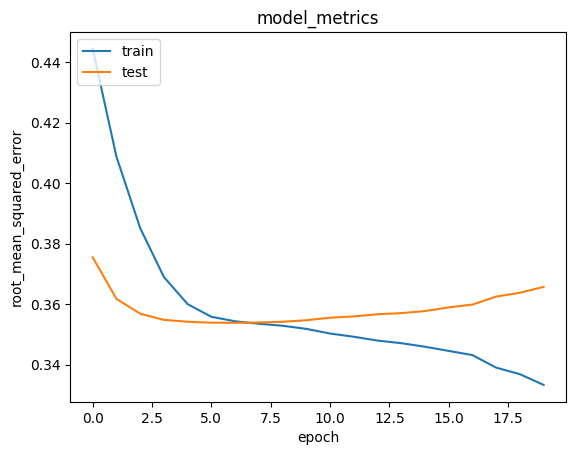

In [90]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_RMSE')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Penjelasan:Membuat visualisasi RMSE antara data train dengan data validation.

In [93]:
# Ambil 1 user secara acak
user_id = df.userID.sample(1).iloc[0]
game_played_by_user = df[df.userID == user_id]

# Game yang belum dimainkan user
game_not_played = df_game[~df_game['game_id'].isin(game_played_by_user.gameID.values)]['game_id']
game_not_played = list(set(game_not_played).intersection(set(game_to_game_encoded.keys())))

# Encoding game dan user
game_not_played = [[game_to_game_encoded.get(x)] for x in game_not_played]
user_encoder = user_to_user_encoded.get(user_id)
user_game_array = np.hstack(
    ([[user_encoder]] * len(game_not_played), game_not_played)
)

# Prediksi rating user untuk game yang belum dimainkan
ratings = model.predict(user_game_array).flatten()

# Ambil top 10 prediksi rating tertinggi
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_game_ids = [
    game_encoded_to_game.get(game_not_played[x][0]) for x in top_ratings_indices
]

# Tampilkan hasil
print('Rekomendasi untuk user:', user_id)
print('===' * 9)

print('Game dengan rating tertinggi oleh user')
print('----' * 8)
top_game_user = (
    game_played_by_user.sort_values(by='rating', ascending=False)
    .head(5)
    .gameID.values
)
top_game_rows = df_game[df_game['game_id'].isin(top_game_user)]
for row in top_game_rows.itertuples():
    print(row.name, ':', row.genres)

print('----' * 8)
print('Top 10 Rekomendasi Game')
print('----' * 8)
recommended_games = df_game[df_game['game_id'].isin(recommended_game_ids)]
for row in recommended_games.itertuples():
    print(row.name, ':', row.genres)


156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Rekomendasi untuk user: user_2378
Game dengan rating tertinggi oleh user
--------------------------------
Lone Survivor: The Director's Cut : Action, Adventure, RPG, Simulation, Indie
The First Tree : Adventure, Indie
Sniper Elite 5 : Action, Shooter, Adventure
Confrontation : Action, RPG, Strategy
Rusty Lake Paradise : Adventure, Indie, Puzzle
--------------------------------
Top 10 Rekomendasi Game
--------------------------------
Wolfenstein: The New Order : Action, Shooter
Mafia II : Action, Shooter
Borderlands 3 : Action, Shooter, Adventure, RPG
Streets of Rage 4 : Action, Adventure, Fighting, Indie
Survarium : Action, RPG, Massively Multiplayer
Caster : Action, Adventure, RPG, Strategy, Casual, Indie
Team Sonic Racing : Racing
Crime Cities : Action, Simulation, Racing, Arcade
Legends of Eisenwald : Adventure, RPG, Strategy, Indie
Dungeons & Dragons: Chronicles of Mystara : Action, Adventure, RPG


## Evaluasi

### Evaluasi Content-Based Filtering

**Metrik Evaluasi Content-Based Filtering: Presisi**

Presisi adalah metrik yang digunakan untuk mengukur seberapa relevan item yang direkomendasikan oleh sistem. Ini dihitung sebagai rasio jumlah rekomendasi yang relevan dengan total jumlah item yang direkomendasikan.


$$
Precision@k = \frac{\text{Jumlah Item relevan dalam top-k}}{\text{k}}
$$

Dimana:


*   Jumlah item relevan dalam top-k berarti: dari top-k rekomendasi, berapa banyak item yang juga muncul dalam ground truth.
*   k adalah jumlah rekomendasi yang dievaluasi



Bagaimana Precision@k bekerja:

1.Model akan memberikan hasil rekomendasi kepada user

2.Ambil top-k dari hasil rekomendasi tersebut

3.Bandingkan dengan ground truth (daftar item relevan untuk user)

4.Hitung berapa banyak dari top-k item yang juga ada di ground truth

5.Hitung Precision@k


**Implementasi Precision@k dan Evaluasi Model**

In [97]:
# Ground truth: daftar game relevan
relevant_games = [
    'Grand Theft Auto V',
    'Grand Theft Auto IV',
    'Red Dead Redemption',
    'Ghostbusters: The Video Game',
    'Silent Hill 4: The Room'
]


Penjelasan:Kita memiliki Ground Truth sebagai berikut.

In [98]:
# Mendapatkan rekomendasi berdasarkan game 'Grand Theft Auto: San Andreas'
recommended_games = game_recommendations('Grand Theft Auto: San Andreas', k=5)['name'].tolist()

print("Rekomendasi:")
for game in recommended_games:
    print("-", game)


Rekomendasi:
- Grand Theft Auto V
- Ghostbusters: The Video Game
- Silent Hill 4: The Room
- The Legend of Korra
- A.V.A. Alliance of Valiant Arms


Penjelasan:Berdasarkan rekomendasi game untuk Grand Theft Auto: San Andreas; untuk k = 5,maka didapat Jumlah item relevan dalam top-k = 3

In [99]:
def precision_at_k(recommended, relevant, k=5):
    recommended_top_k = recommended[:k]
    relevant_set = set(relevant)
    hits = sum(1 for game in recommended_top_k if game in relevant_set)
    return hits / k

# Hitung Precision@5
p_at_5 = precision_at_k(recommended_games, relevant_games, k=5)

print(f"\nPrecision@5: {p_at_5:.2f}")



Precision@5: 0.60


Hasil Evaluasi : Berdasarkan Jumlah item relevan dalam top-k = 3 dan k = jumlah rekomendasi yang di evaluasi  = 5 maka didapat hasil Precision@k  = 3/5 = 0.60.
Berdasarkan hasil evaluasi, diperoleh nilai Precision@k sebesar 0.60, yang menunjukkan bahwa 60% dari item yang direkomendasikan oleh sistem dalam top-5 adalah relevan bagi pengguna. Hal ini mengindikasikan bahwa sistem memiliki tingkat ketepatan yang cukup baik dalam memberikan rekomendasi yang sesuai dengan preferensi pengguna.

### Evaluasi Collaborative Filtering

**Metrik Evaluasi Collaborative Filtering: MSE & RMSE**

#### Mean Squared Error (MSE)
MAE mengukur rata-rata selisih absolut antara nilai prediksi dan nilai aktual.

**Rumus MSE:**

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Dimana:

- $n$ = jumlah sampel (data prediksi)

- $y_i$ = rating aktual ke-i

- $\hat{y}_i$ = rating hasil prediksi ke-i


#### Root Mean Squared Error (RMSE)
RMSE mengukur akar dari rata-rata kuadrat selisih antara nilai prediksi dan aktual.

**Rumus RMSE:**

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} = \sqrt{\text{MSE}}
$$

Dimana:
- $n$ = jumlah sampel (data prediksi)

- $y_i$ = rating aktual ke-i

- $\hat{y}_i$ = rating hasil prediksi ke-i


**Implementasi MSE,RMSE dan Evaluasi Model**

In [103]:
results = model.evaluate(x_val, y_val, verbose=1)
print(f"\n[Hasil Evaluasi terhadap Data Validasi]")
print(f"Loss (MSE): {results[0]:.4f}")
print(f"RMSE      : {results[1]:.4f}")


1711/1711 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1399 - root_mean_squared_error: 0.3572

[Hasil Evaluasi terhadap Data Validasi]
Loss (MSE): 0.1403
RMSE      : 0.3577


Hasil Evaluasi Collaborative Filtering menunjukkan performa pada data validasi dengan nilai Loss(MSE) sebesar 0.1403 dan RMSE sebesar 0.3557.Nilai MSE tersebut menunjukkan rata-rata kuadrat selisih antara rating aktual dan prediksi cukup kecil, yang berarti model memiliki tingkat kesalahan yang rendah dalam memprediksi rating user terhadap game.Dan Nilai RMSE,artinya secara rata-rata, prediksi rating model hanya meleset sekitar 0.36 poin dari rating asli, yang termasuk cukup baik untuk skala normalized rating (0–1).